In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
demand_data='train.csv'
demand_df=pd.read_csv(demand_data)

In [ ]:
demand_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
demand_df.drop('id',axis=1,inplace=True)

In [ ]:
demand_df.shape

(456548, 8)

In [ ]:
demand_df['center_id'].unique()

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61])

In [ ]:
demand_df['meal_id'].unique()

array([1885, 1993, 2539, 2139, 2631, 1248, 1778, 1062, 2707, 1207, 1230,
       2322, 2290, 1727, 1109, 2640, 2306, 2126, 2826, 1754, 1971, 1902,
       1311, 1803, 1558, 2581, 1962, 1445, 2444, 2867, 1525, 2704, 2304,
       2577, 1878, 1216, 1247, 1770, 1198, 1438, 2494, 1847, 2760, 2492,
       1543, 2664, 2569, 2490, 1571, 2956, 2104])

In [ ]:
len(demand_df['center_id'].unique())

77

In [ ]:
len(demand_df['meal_id'].unique())

51

In [ ]:
center_data='fulfilment_center_info.csv'
center_df=pd.read_csv(center_data)

In [ ]:
center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
meal_data='meal_info.csv'
meal_df=pd.read_csv(meal_data)

In [ ]:
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
demand_df=pd.merge(center_df,demand_df,how='inner',on='center_id')

In [ ]:
demand_df=pd.merge(meal_df,demand_df,how='inner',on='meal_id')

In [ ]:
demand_df

,meal_id,category,cuisine,center_id,city_code,region_code,center_type,op_area,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,1,136.83,136.83,0,0,959
1,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,2,133.86,135.86,0,0,1054
2,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,3,135.86,133.86,0,0,891
3,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,4,134.86,135.86,0,0,1107
4,1885,Beverages,Thai,11,679,56,TYPE_A,3.7,5,146.53,146.53,0,0,919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,141,728.53,727.53,0,0,27
456544,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,142,728.53,728.53,0,0,40
456545,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,143,485.03,727.53,0,1,204
456546,1445,Seafood,Continental,51,638,56,TYPE_A,7.0,144,484.03,728.53,1,1,337


In [ ]:
sample=demand_df[['week','num_orders']].groupby(by='week').sum()

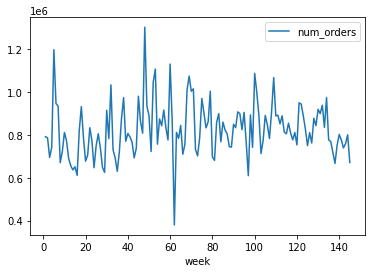

In [ ]:
sample.plot()

In [ ]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   meal_id                456548 non-null  int64  
 1   category               456548 non-null  object 
 2   cuisine                456548 non-null  object 
 3   center_id              456548 non-null  int64  
 4   city_code              456548 non-null  int64  
 5   region_code            456548 non-null  int64  
 6   center_type            456548 non-null  object 
 7   op_area                456548 non-null  float64
 8   week                   456548 non-null  int64  
 9   checkout_price         456548 non-null  float64
 10  base_price             456548 non-null  float64
 11  emailer_for_promotion  456548 non-null  int64  
 12  homepage_featured      456548 non-null  int64  
 13  num_orders             456548 non-null  int64  
dtypes: float64(3), int64(8), object(3)
m

## Exploratory data analysis

In [ ]:
roll_mean=sample.rolling(window=10).mean()
roll_std=sample.rolling(window=10).std()

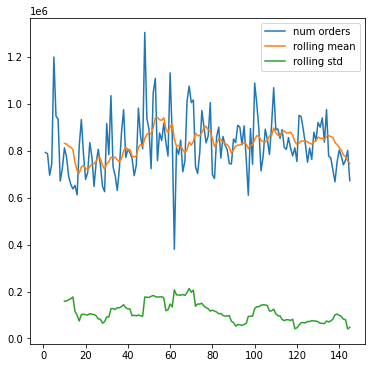

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(sample,label='num orders')
plt.plot(roll_mean,label='rolling mean')
plt.plot(roll_std,label='rolling std')
plt.legend()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sample.index=pd.date_range(start='01/01/2019',periods=145,freq='7d')

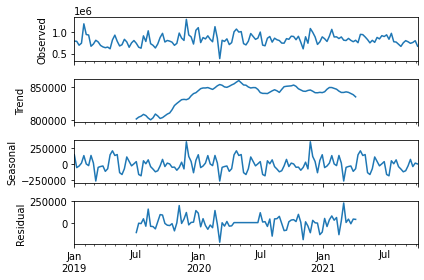

In [ ]:
decomposition=seasonal_decompose(sample,'additive').plot()

In [ ]:
#Week doesn't seem to have any impact on number of orders placed
#since there is no clear increasing or decreasing trend
#Seasonality is also not clearly defined

<Figure size 792x792 with 0 Axes>

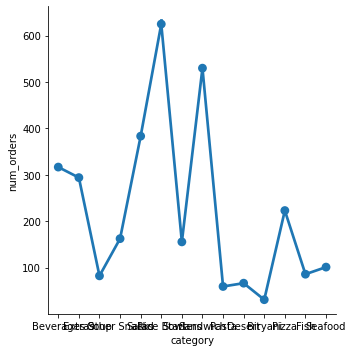

In [ ]:
fig=plt.figure(figsize=(11,11))
sns.catplot(x='category',y='num_orders',kind='point',data=demand_df,orient='v')

In [ ]:
#For different cuisines, the number of food orders differ. This shows it's impact on total number of orders

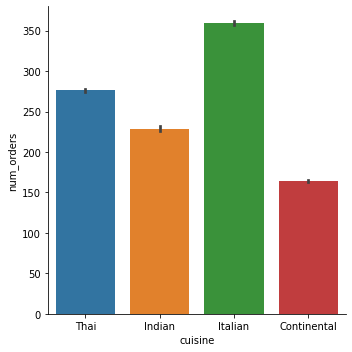

In [ ]:
sns.catplot(x='cuisine',y='num_orders',kind='bar',data=demand_df,orient='v')

In [ ]:
demand_df['city_code'].value_counts()

590    54746
526    43525
638    20047
522    13459
517    13109
604    13062
699    12098
647    11833
576    11456
614    11332
676    11177
593    10804
685     6993
700     6891
713     6853
579     6843
679     6801
456     6716
703     6706
698     6434
577     6389
599     6296
596     6293
648     6090
602     6057
659     6053
654     6041
628     5983
651     5975
562     5938
615     5892
556     5885
473     5855
561     5846
461     5763
620     5732
609     5721
675     5715
485     5712
658     5591
553     5547
649     5528
680     5379
683     5296
695     5296
632     5292
702     5264
515     5085
478     5021
693     4627
541     4501
Name: city_code, dtype: int64

In [ ]:
len(demand_df['city_code'].unique())

51

In [ ]:
demand_df['region_code'].value_counts()

56    191228
34    116713
77     94612
85     30283
23      6434
71      6293
93      5721
35      5264
Name: region_code, dtype: int64

In [ ]:
demand_df['center_type'].value_counts()

TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64

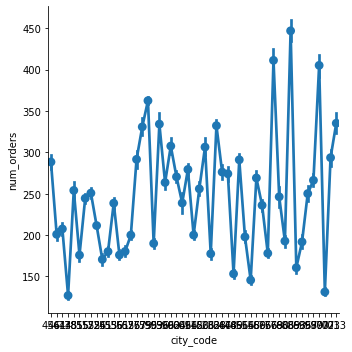

In [ ]:


sns.catplot(x='city_code',y='num_orders',kind='point',data=demand_df)


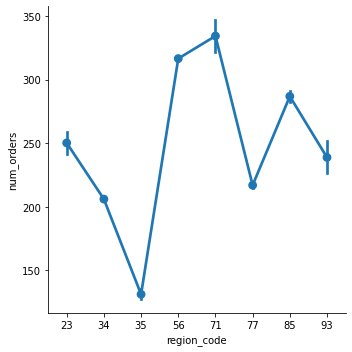

In [ ]:

sns.catplot(x='region_code',y='num_orders',kind='point',data=demand_df)



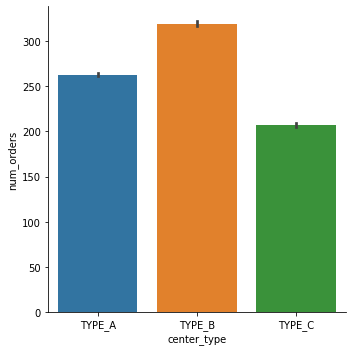

In [ ]:
sns.catplot(x='center_type',y='num_orders',kind='bar',data=demand_df)

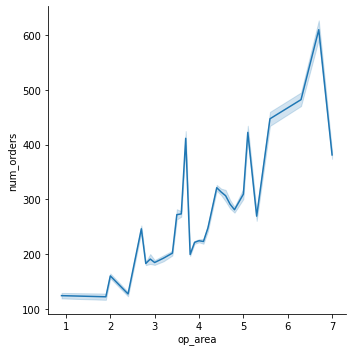

In [ ]:
sns.relplot(x='op_area',y='num_orders',kind='line',data=demand_df)

In [ ]:
#As the total operation area increases, number of order increases

In [ ]:
print(max(demand_df['checkout_price']))
print(min(demand_df['checkout_price']))
print(demand_df['checkout_price'].mean())

866.27
2.97
332.23893255521


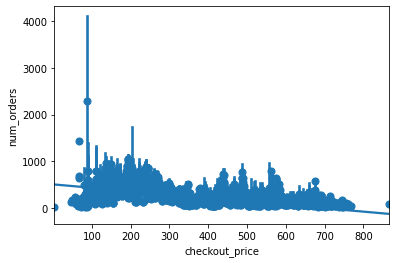

In [ ]:
sns.regplot(x='checkout_price',y='num_orders',data=demand_df,x_estimator=np.mean)

In [ ]:
print(max(demand_df['base_price']))
print(min(demand_df['base_price']))
print(demand_df['base_price'].mean())

866.27
55.35
354.1566274525984


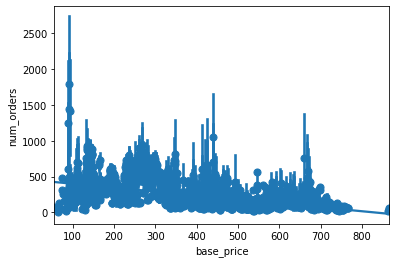

In [ ]:
sns.regplot(x='base_price',y='num_orders',x_estimator=np.mean,data=demand_df)

In [ ]:
demand_df['price_diff']=demand_df['base_price']-demand_df['checkout_price']

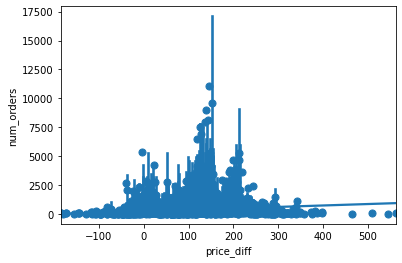

In [ ]:
sns.regplot(x='price_diff',y='num_orders',data=demand_df,x_estimator=np.mean)

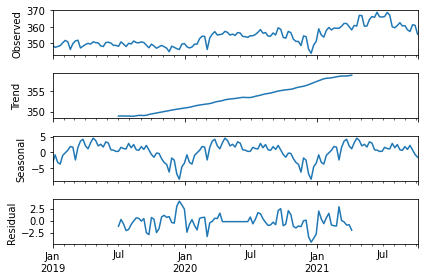

In [ ]:
sample=demand_df[['week','base_price']].groupby(by='week').mean()
sample.index=pd.date_range(start='01/01/2019',periods=145,freq='7d')
decomposition=seasonal_decompose(sample,'additive').plot()

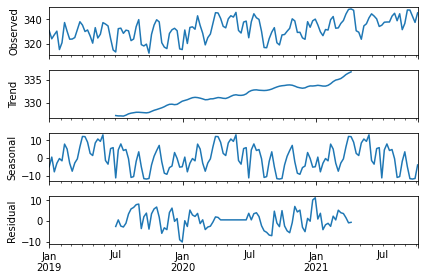

In [ ]:
sample=demand_df[['week','checkout_price']].groupby(by='week').mean()
sample.index=pd.date_range(start='01/01/2019',periods=145,freq='7d')
decomposition=seasonal_decompose(sample,'additive').plot()

In [ ]:
demand_df[['num_orders','base_price','checkout_price','week']].corr().style.background_gradient(cmap='PuBu')

,num_orders,base_price,checkout_price,week
num_orders,1.000000,-0.222306,-0.282108,-0.017210
base_price,-0.222306,1.000000,0.953389,0.028614
checkout_price,-0.282108,0.953389,1.000000,0.026581
week,-0.017210,0.028614,0.026581,1.000000


In [ ]:
demand_df['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

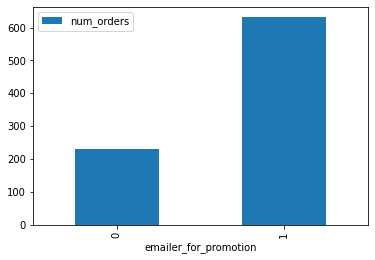

In [ ]:
sample=demand_df[['emailer_for_promotion','num_orders']].groupby(by='emailer_for_promotion').mean().plot(kind='bar')

In [ ]:
demand_df['homepage_featured'].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

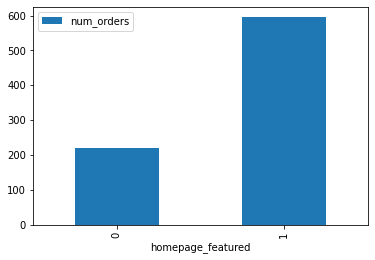

In [ ]:
sample=demand_df[['homepage_featured','num_orders']].groupby(by='homepage_featured').mean().plot(kind='bar')

## Variable treatment

In [ ]:
demand_df.dtypes

meal_id                    int64
category                  object
cuisine                   object
center_id                  int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
price_diff               float64
dtype: object

In [ ]:
demand_df.drop(labels=['meal_id','center_id','week','price_diff'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
demand_df['category']=le.fit_transform(demand_df['category'])

In [ ]:
sample=pd.get_dummies(data=demand_df['cuisine'],drop_first=True)
demand_df=pd.concat([sample,demand_df],axis=1)

In [ ]:
sample=pd.get_dummies(data=demand_df['center_type'],drop_first=True)
demand_df=pd.concat([sample,demand_df],axis=1)

In [ ]:
demand_df.columns

Index(['TYPE_B', 'TYPE_C', 'Indian', 'Italian', 'Thai', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area', 'checkout_price',
       'base_price', 'emailer_for_promotion', 'homepage_featured',
       'num_orders'],
      dtype='object')

In [ ]:
demand_df.drop(['cuisine','center_type'],axis=1,inplace=True)

## Model Building

In [ ]:
X=demand_df.iloc[:,0:-1].values
y=demand_df.iloc[:,-1].values

In [ ]:
X[1]

array([  0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  , 679.  ,  56.  ,
         3.7 , 133.86, 135.86,   0.  ,   0.  ])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
from math import sqrt


### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
MSE=cross_val_score(estimator=lr,X=X,y=y,scoring='neg_mean_squared_error',cv=5)

In [ ]:
print('RMSE value:',sqrt(abs(MSE.mean())))

RMSE value: 392.46781785397616


### Decision Tree Regressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
print(X_train.shape,y_train.shape)

(319583, 13) (319583,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor(criterion='mse',random_state=0)

In [ ]:
params={'max_features':[7,8,9,10],
        'max_depth':[14,15,16],
        }

In [ ]:
random=RandomizedSearchCV(estimator=dtr,param_distributions=params,n_iter=15,scoring='neg_mean_squared_error',cv=5,random_state=0)

In [ ]:
random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=14, max_features=8,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=0,
                                                   splitter='best'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   para

In [ ]:
print(random.best_params_)
print(random.best_score_)

{'max_features': 8, 'max_depth': 15}
-48588.81897326904


In [ ]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_split=2,max_features=8,random_state=0)

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
MSE=cross_val_score(estimator=dtr,X=X,y=y,scoring='neg_mean_squared_error',cv=5)
print('RMSE value:',sqrt(abs(MSE.mean())))

RMSE value: 504.2608326501746


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,random_state=0)

In [ ]:
params={'min_samples_split':[2,5,4],
        'max_depth':[13,11,12],
        'max_features':[10,12,11]}

In [ ]:
random=RandomizedSearchCV(estimator=rfr,param_distributions=params,n_iter=15,scoring='neg_mean_squared_error',cv=2,random_state=0)


In [ ]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
print(random.best_params_)
print(random.best_score_)

{'min_samples_split': 4, 'max_features': 10, 'max_depth': 13}
-40139.506773639805


In [ ]:
rfr=RandomForestRegressor(n_estimators=100,max_depth=14,min_samples_split=3,max_features=10,random_state=0)

In [ ]:
MSE=cross_val_score(estimator=rfr,X=X,y=y,scoring='neg_mean_squared_error',cv=5)
print('RMSE value:',sqrt(abs(MSE.mean())))

RMSE value: 405.206334611182


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor(random_state=0,objective='reg:linear')

In [ ]:
params={'max_depth':[2,4,6,8],
        'learning_rate':[.1,.05,.08],
        'n_estimators':[50,80,100,120],
        'booster':['gbtree','gblinear'],
        'reg_alpha':[0,.1,.3]}

In [ ]:
random=RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=30,scoring='neg_mean_squared_error',cv=2,random_state=0)

In [ ]:
random.fit(X_train,y_train)

[12:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=30, n_job

In [ ]:
print(random.best_params_)
print(random.best_score_)

{'reg_alpha': 0, 'n_estimators': 120, 'max_depth': 8, 'learning_rate': 0.1, 'booster': 'gbtree'}
-36436.80353823294


In [ ]:
xgb=XGBRegressor(max_depth=9,learning_rate=.1,n_estimators=130,objective='reg:linear',reg_alpha=0,reg_lambda=.9,random_state=0)

In [ ]:
MSE=cross_val_score(estimator=xgb,X=X,y=y,scoring='neg_mean_squared_error',cv=5)
print('RMSE value:',sqrt(abs(MSE.mean())))

[12:51:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE value: 405.6783176861417


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(learning_rate=.1,n_estimators=100,random_state=0)

In [ ]:
MSE=cross_val_score(estimator=gbr,X=X,y=y,scoring='neg_mean_squared_error',cv=5)
print('RMSE value:',sqrt(abs(MSE.mean())))

RMSE value: 370.73787743002345


**From all the above models, the best one is GradientBoostingRegressor**